<a href="https://colab.research.google.com/github/alexanechka/app_desing/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D1%8B%D1%85_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проектирование прикладных приложений

## Согласование заявок на оплату

####__1. Предметная область__
Проектируемое приложение разработывается для автоматизации процесса согласования заявок на оплату. Приложение позволит контролировать затраты на продукты.
Для совершения закупки продукта организации пользователь должен сформировать заявку на оплату. Заявка на оплату проходит согласование ответственным пользователем и после этого отправляется на оплату в бухгалтерию. Также заявка может быть отклонена.
В случае успешного согласования заявки пользователь, сотрудник бухгалтерии, формирует платежное поручение на оплату продукта.
Пользователь, инициатор заявки, информируется о статусах движения по заявке.


####__2. ER-диаграмма__
Сущности:
*   Пользователи (users)
*   Виды ролей пользователей (roles)
*   Роли пользователей (user_roles)
*   Номенклатура (products)
*   Заявки на оплату (requests)
*   Движения заявок (request_road)


[ERD](https://dbdesigner.page.link/j9GtqJYBgcpidThy9)
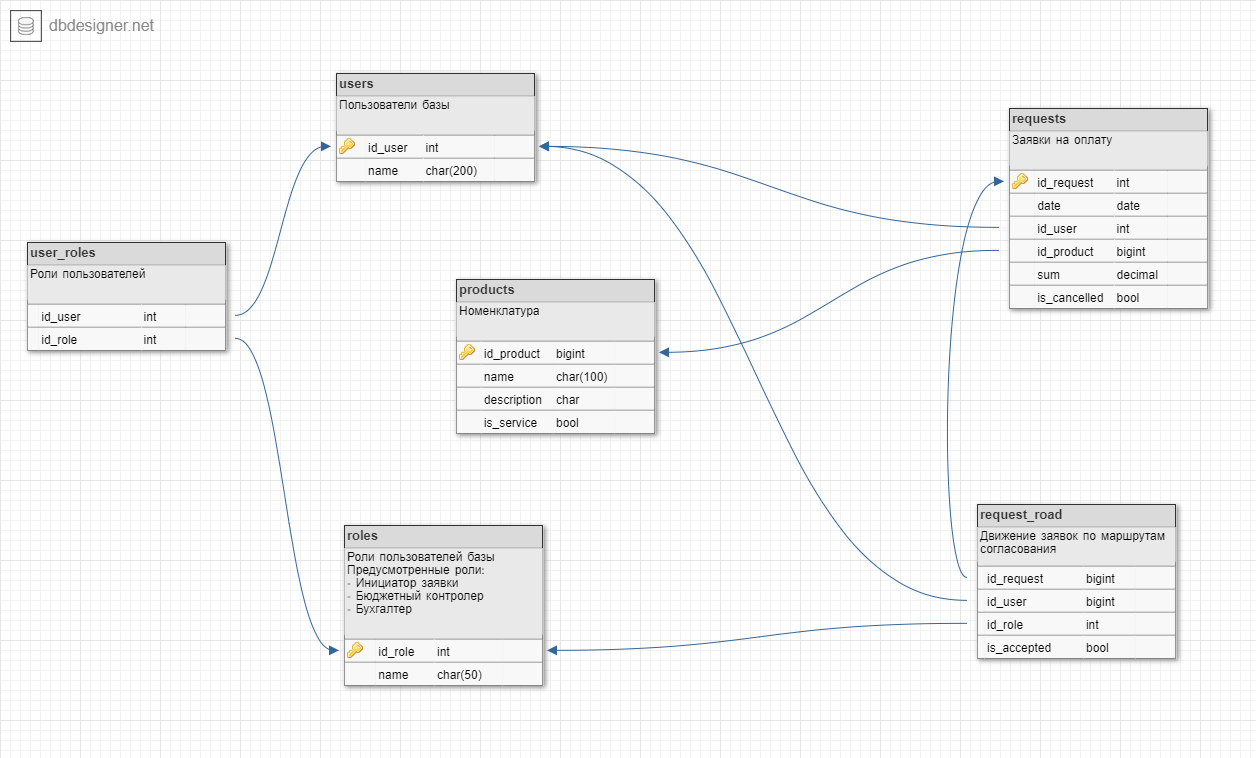

Выбранная СУБД для реализации проекта - реляционная СУБД MySQL. 

Примерный код создания базы данных:
```
CREATE TABLE `users` (
	`id_user` int NOT NULL AUTO_INCREMENT,
	`name` char(200) NOT NULL,
	PRIMARY KEY (`id_user`)
);

CREATE TABLE `roles` (
	`id_role` int NOT NULL AUTO_INCREMENT,
	`name` char(50) NOT NULL,
	PRIMARY KEY (`id_role`)
);

CREATE TABLE `user_roles` (
	`id_user` int NOT NULL,
	`id_role` int NOT NULL
);

CREATE TABLE `products` (
	`id_product` bigint NOT NULL AUTO_INCREMENT,
	`name` char(100) NOT NULL,
	`description` char NOT NULL,
	`is_service` bool NOT NULL,
	PRIMARY KEY (`id_product`)
);

CREATE TABLE `requests` (
	`id_request` int NOT NULL AUTO_INCREMENT,
	`date` DATE NOT NULL,
	`id_user` int NOT NULL,
	`id_product` bigint NOT NULL,
	`sum` DECIMAL NOT NULL,
	`is_cancelled` bool NOT NULL DEFAULT 'False',
	PRIMARY KEY (`id_request`)
);

CREATE TABLE `request_road` (
	`id_request` bigint NOT NULL,
	`id_user` bigint NOT NULL,
	`id_role` int NOT NULL,
	`is_accepted` bool NOT NULL
);

ALTER TABLE `user_roles` ADD CONSTRAINT `user_roles_fk0` FOREIGN KEY (`id_user`) REFERENCES `users`(`id_user`);

ALTER TABLE `user_roles` ADD CONSTRAINT `user_roles_fk1` FOREIGN KEY (`id_role`) REFERENCES `roles`(`id_role`);

ALTER TABLE `requests` ADD CONSTRAINT `requests_fk0` FOREIGN KEY (`id_user`) REFERENCES `users`(`id_user`);

ALTER TABLE `requests` ADD CONSTRAINT `requests_fk1` FOREIGN KEY (`id_product`) REFERENCES `products`(`id_product`);

ALTER TABLE `request_road` ADD CONSTRAINT `request_road_fk0` FOREIGN KEY (`id_request`) REFERENCES `requests`(`id_request`);

ALTER TABLE `request_road` ADD CONSTRAINT `request_road_fk1` FOREIGN KEY (`id_user`) REFERENCES `users`(`id_user`);

ALTER TABLE `request_road` ADD CONSTRAINT `request_road_fk2` FOREIGN KEY (`id_role`) REFERENCES `roles`(`id_role`);

```



####__3. Use case__
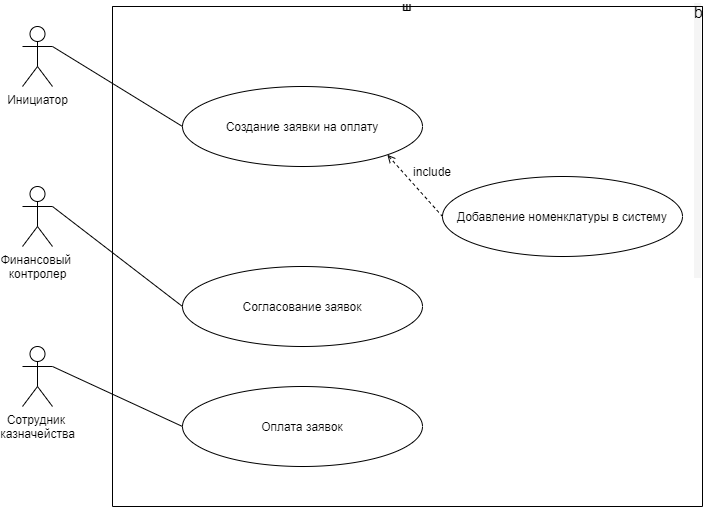